# yolov5
version 2 test

author: nmc-costa

info: testing version 2


# Setup
Go to tutorial_yolov5.ipnb for full setup (like cloning the yolov5 repo, etc...)

In [1]:
import os
import sys
import platform
import torch
from IPython.display import Image, clear_output  # to display images

#cuda or cpu version
clear_output()
print('OS: {}'.format(platform.platform()))
print("Python: " + sys.version)
#os.environ["CUDA_VISIBLE_DEVICES"]="" #force CPU
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

OS: Linux-4.19.128-microsoft-standard-x86_64-with-debian-bullseye-sid
Python: 3.7.7 (default, May  7 2020, 21:25:33) 
[GCC 7.3.0]
Setup complete. Using torch 1.5.1+cu101 _CudaDeviceProperties(name='GeForce GTX 1070', major=6, minor=1, total_memory=8192MB, multi_processor_count=16)


In [2]:
#yolov5 repo [other ways: %cd yolov5; or pip install yolov5 module as "editable" using a setup.py file]
import yolov5
from yolov5.utils.google_utils import gdrive_download  # to download models/datasets


## init vars

In [3]:
#script dir [in case you use cd]
scriptdir=sys.path[0] #os.getcwd()

#yolov5 Dir
yolov5_dir=os.path.join(scriptdir, 'yolov5')
print(yolov5_dir)

/mnt/c/Users/nmc_costa/google_drive/projects/bosch_P19/research/python_ws/violent_action/yolo/yolov5


## input data

#### Prepare the dataset for yolo format (CHECK OUT https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data ; https://medium.com/towards-artificial-intelligence/yolo-v5-is-here-custom-object-detection-tutorial-with-yolo-v5-12666ee1774e)

##### 1. create dataset .yaml file (like coco_external)

Yolov5 algorithm parses yaml information: path to dataset(train, validation and test) in YOLO (darknet) format (see below); number of classes and classes names

##### 2. Create labels and organize dataset in YOLO format (USE $JSON2YOLO$ folder)

Dataset Directory structure:
- dataset:
    - annotations:
        - samefoldername.json (WARNING: use 'train', 'val', 'test')
    - images:
        - samefoldername
    - labels:
        - samefoldername

Example :

dataset/images/train/000000109622.jpg  # image

dataset/labels/train/000000109622.txt  # label



##### 3. Select a Model(yolov5s, yolov5x, ...) and update the number of classes to match the dataset

Go to $./models$ folder and change the $nc: $ parameter 

In [21]:
#YAML Paths
yaml=os.path.join(scriptdir, 'tao128_external.yaml')

## 1. Train
Run the training command below to train for X epochs. 

EXAMPLE: You can train YOLOv5s from scratch by passing `--cfg yolov5s.yaml --weights ''`, or train from a pretrained checkpoint by passing a matching weights file: `--cfg yolov5s.yaml --weights yolov5s.pt`.

Train function retrains the model with the new 'train' data and tests the model against the 'val' data

All training results are saved to runs/exp0 for the first experiment, then runs/exp1, runs/exp2 etc. for subsequent experiments.

In [ ]:
# Clear any logs from previous runs (if needed)
logdir=os.path.join(yolov5_dir, 'runs/exp0')
!rm -rfv $logdir

In [6]:
# Start tensorboard (optional)
#BUG WINDOWS are not able to log information
%cd $yolov5_dir

%load_ext tensorboard
#%reload_ext tensorboard
%tensorboard --logdir runs

/mnt/c/Users/nmc_costa/google_drive/projects/bosch_P19/research/python_ws/violent_action/yolo/yolov5


In [20]:
# Train Models from scractch 
#(#WARNING: if using --cache parameter you need to be careful: in yolov5.utils.datasets gives keyerror; #SOLUTION delete cache in dataset folder or don't use --cache)
%cd $yolov5_dir
!python train.py --img 640 --batch 8 --epochs 3 --data $yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt

/mnt/c/Users/nmc_costa/google_drive/projects/bosch_P19/research/python_ws/violent_action/yolo/yolov5
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(batch_size=8, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='/mnt/c/Users/nmc_costa/google_drive/projects/bosch_P19/research/python_ws/violent_action/yolo/tao128_external.yaml', device='', epochs=3, evolve=False, hyp='', img_size=[640], multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1070', total_memory=8192MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Hyperparameters {'optimizer': 'SGD', 'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 

## 2. Output data (Visualize)

View runs/exp0/train*.jpg images to see training images, labels and augmentation effects. A Mosaic Dataloader is used for training (shown below), a new concept developed by Ultralytics and first featured in YOLOv4. If your labels are not correct in these images then you have incorrectly labelled your data, and should revisit 2. Create Labels.

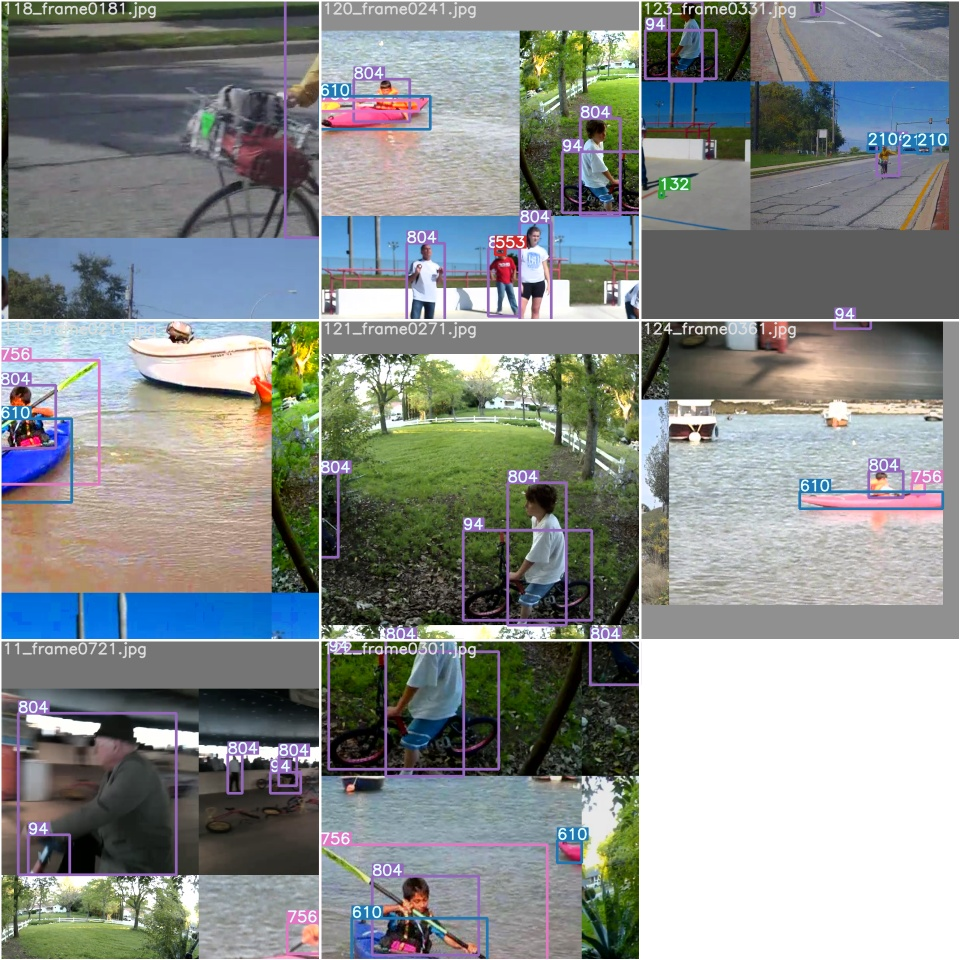

In [9]:
Image(filename=os.path.join(yolov5_dir,'runs/exp0/train_batch1.jpg'), width=900)

## 3. Inference (detect)

In [ ]:
%cd $yolov5_dir
!python detect.py --source /mnt/d/external_datasets/mlab_samples/VIDEOS --output  /mnt/d/external_datasets/mlab_samples/inference/yolov5/yolov5s_tao128test_augment --weights runs/exp0/weights/best.pt --conf 0.4 --augment

## 4. (Re-) Test/validate

(Re-) Test a model on dataset to determine trained accuracy (WARNING : Train already does this). Models are auto-downloaded from Google Drive. To show results by class use the --verbose flag.

In [32]:
# SHELL Ipython: Run YOLOv5x on COCO validation images
%cd $yolov5_dir
!python test.py --weights runs/exp1/weights/best.pt --data $yaml --task 'val' --img 640

/mnt/c/Users/nmc_costa/google_drive/projects/bosch_P19/research/python_ws/violent_action/yolo/yolov5
Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/mnt/c/Users/nmc_costa/google_drive/projects/bosch_P19/research/python_ws/violent_action/yolo/tao128_external.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=False, weights=['runs/exp1/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1070', total_memory=8192MB)

Fusing layers... Model Summary: 140 layers, 1.05611e+07 parameters, 6.61683e+06 gradients
Scanning labels /mnt/d/external_datasets/yoloformat/tao128/labels/val.cache (128
               Class      Images     Targets           P           R      mAP@.5
Traceback (most recent call last):
  File "test.py", line 256, in <module>
    opt.verbose)
  File "test.py", line 92, in test
    output = non_max_suppression(inf_out, conf_thres=conf_thres, iou_thres=iou_thres, merge=merg